## Part 1: Understanding Optimizers

Q1. What is the role of optimization algorithms in artificial neural networks? Why are they necessary?

Optimization algorithms in artificial neural networks are responsible for updating the network's weights and biases to minimize the loss function. This process is essential because it enables the network to learn from the training data by iteratively adjusting the model parameters to reduce errors in predictions. Without optimization algorithms, the network would not be able to improve its performance over time, making it incapable of learning and generalizing from data.

Q2. Explain the concept of gradient descent and its variants. Discuss their differences and tradeoffs in terms of convergence speed and memory requirements.

Gradient Descent is an optimization algorithm used to minimize the loss function by iteratively moving in the direction of the steepest descent as defined by the negative of the gradient. Variants of gradient descent include:
1. Batch Gradient Descent: Computes the gradient of the loss function with respect to the entire dataset. While it can converge to the global minimum, it is computationally expensive and requires significant memory for large datasets.

2. Stochastic Gradient Descent (SGD): Computes the gradient using a single training example. This method is faster and requires less memory but can result in noisy updates, leading to potential oscillations and instability.

3. Mini-Batch Gradient Descent: Combines aspects of both batch and stochastic gradient descent by computing the gradient on small batches of data. It strikes a balance between convergence speed and memory requirements, offering more stable updates than SGD and faster convergence than batch gradient descent.

Tradeoffs:

- Batch Gradient Descent: Slow convergence, high memory requirement.
- SGD: Faster updates, less memory, potential for noisy convergence.
- Mini-Batch Gradient Descent: Balanced approach, moderate memory, and convergence speed.

Q3. Describe the challenges associated with traditional gradient descent optimization methods (e.g., slow convergence, local minima). How do modern optimizers address these challenges?

Challenges:
- Slow Convergence: Traditional gradient descent can take a long time to converge, especially with high-dimensional data.
- Local Minima: The algorithm can get stuck in local minima or saddle points, hindering it from finding the global minimum.
- Learning Rate: Choosing an appropriate learning rate is challenging. A learning rate too high can cause overshooting, while a rate too low results in slow convergence.

Modern Optimizers:

- Momentum: Helps accelerate gradient vectors by adding a fraction of the previous update to the current update, reducing oscillations and improving convergence speed.
- Adaptive Learning Rates: Algorithms like AdaGrad, RMSprop, and Adam adjust the learning rate based on past gradients, allowing for faster and more stable convergence.
- Adam: Combines the benefits of momentum and adaptive learning rates, addressing slow convergence and improving stability by adapting learning rates for each parameter.

Q4. Discuss the concepts of momentum and learning rate in the context of optimization algorithms. How do they impact convergence and model performance?

Momentum:
- Concept: Momentum helps accelerate gradient descent by adding a fraction of the previous update to the current update.
- Impact: It reduces oscillations, especially in regions with high curvature, and can lead to faster convergence by maintaining a consistent update direction.

Learning Rate:
- Concept: The learning rate determines the step size for updating the model parameters.
- Impact: A high learning rate can cause overshooting and divergence, while a low learning rate results in slow convergence. Adaptive learning rates help mitigate these issues by adjusting the learning rate during training.

## Part 2: Optimizer Techniques
Q5. Explain the concept of Stochastic Gradient Descent (SGD) and its advantages compared to traditional gradient descent. Discuss its limitations and scenarios where it is most suitable.

Concept:
- SGD updates the model parameters using the gradient of the loss function computed from a single training example or a mini-batch.

Advantages:
- Efficiency: Faster updates and reduced memory requirements compared to batch gradient descent.
- Exploration: Can escape local minima due to its noisy updates.

Limitations:
- Noisy Convergence: May result in oscillations and instability due to high variance in updates.
- Learning Rate Sensitivity: Requires careful tuning of the learning rate to ensure convergence.

Suitability:
- Suitable for large datasets where batch gradient descent is computationally expensive and memory-intensive.
- Effective for online learning where the model is updated with each new data point.

Q6. Describe the concept of Adam optimizer and how it combines momentum and adaptive learning rates. Discuss its benefits and potential drawbacks.

Adam (Adaptive Moment Estimation) Optimizer:
- Concept: Adam combines the advantages of two other extensions of stochastic gradient descent, specifically Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSprop). It calculates adaptive learning rates for each parameter by computing the first moment (mean) and second moment (uncentered variance) of the gradients.

How it Works:
- Momentum: Adam incorporates momentum by calculating the exponentially weighted moving average of the gradients (first moment) to stabilize and accelerate convergence.
- Adaptive Learning Rates: It adjusts the learning rates for each parameter based on the exponentially weighted moving average of the squared gradients (second moment), providing a more precise update.

Benefits:
- Adaptive Learning Rates: Automatically adjusts learning rates, making it less sensitive to initial learning rate settings.
- Momentum: Reduces oscillations and speeds up convergence by considering the direction and magnitude of past gradients.
- Efficiency: Suitable for large-scale data and high-dimensional parameter spaces.

Drawbacks:
- Memory Usage: Requires additional memory to store first and second moment estimates.
- Hyperparameter Sensitivity: Requires tuning of several hyperparameters (learning rate, beta1, beta2).

Q7. Explain the concept of RMSprop optimizer and how it addresses the challenges of adaptive learning rates. Compare it with Adam and discuss their relative strengths and weaknesses.

RMSprop (Root Mean Square Propagation) Optimizer:

- Concept: RMSprop addresses the challenges of adaptive learning rates by maintaining a moving average of the squared gradients for each parameter and using this average to normalize the gradient.

How it Works:
- Adaptive Learning Rates: RMSprop divides the learning rate by an exponentially decaying average of squared gradients, ensuring that the updates are not too large.
- Decay Factor: A decay factor is used to control the moving average of the squared gradients.

Strengths:
- Stability: Provides stable and reliable convergence, especially for non-stationary objectives.
- Efficient for Deep Networks: Particularly effective for deep neural networks and recurrent neural networks.

Weaknesses:
- Learning Rate Sensitivity: Still requires careful tuning of the learning rate.
- Lack of Momentum: Does not incorporate momentum, which can slow down convergence compared to Adam.

Comparison with Adam:
- Adam combines the benefits of RMSprop and momentum, making it more robust and efficient for various tasks.
- RMSprop is simpler and requires fewer hyperparameters to tune, making it easier to implement and understand.

## Part 3: Applying Optimizers

Q8. Implement SGD, Adam, and RMSprop optimizers in a deep learning model using a framework of your choice. Train the model on a suitable dataset and compare their impact on model convergence and performance.

11490434/11490434 [==============================] - 0s 0us/step


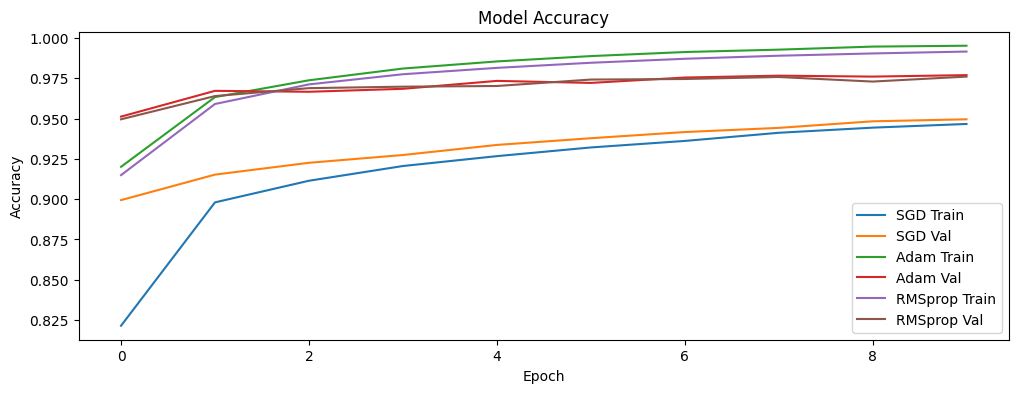

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a simple neural network model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train the model with different optimizers
optimizers = {'SGD': SGD(), 'Adam': Adam(), 'RMSprop': RMSprop()}
histories = {}

for name, optimizer in optimizers.items():
    model = create_model()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
    histories[name] = history

# Plot the training histories
plt.figure(figsize=(12, 4))
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} Train')
    plt.plot(history.history['val_accuracy'], label=f'{name} Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Q9. Discuss the considerations and tradeoffs when choosing the appropriate optimizer for a given neural network architecture and task. Consider factors such as convergence speed, stability, and generalization performance.

Considerations and Tradeoffs:
1. Convergence Speed:

- SGD: Faster per-iteration updates but may require more epochs to converge.
- Adam: Generally faster convergence due to adaptive learning rates and momentum.
- RMSprop: Provides stable and moderate convergence speed.

2. Stability:
- SGD: Prone to noisy updates and oscillations, especially with large learning rates.
- Adam: More stable due to adaptive learning rates and momentum.
- RMSprop: Stable convergence, particularly suitable for non-stationary objectives.

3. Generalization Performance:

- SGD: Can lead to better generalization due to its inherent noise, which acts as a form of regularization.
- Adam: May sometimes overfit due to its aggressive optimization, but generally provides good performance.
- RMSprop: Effective for deep and recurrent networks, but may require careful tuning to avoid overfitting.

4. Memory and Computational Requirements:
- SGD: Minimal memory usage and computationally inexpensive.
- Adam: Higher memory usage due to storing first and second moment estimates.
- RMSprop: Moderate memory usage.

5. Task and Architecture:
- SGD: Suitable for large-scale and online learning tasks.
- Adam: Preferred for most tasks due to its robustness and efficiency.
- RMSprop: Effective for tasks with non-stationary objectives and deep learning architectures.